Face Expression Recognition using Resnet Model and pytorch library

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import torch 

Loading the data

In [3]:
train_dataset_path ='C:/Users/MSI/OneDrive/Desktop/3 ING/Semestre 1/Indexation/Mini Projet/Travail Mini Projet/archive/train' 
valid_dataset_path = 'C:/Users/MSI/OneDrive/Desktop/3 ING/Semestre 1/Indexation/Mini Projet/Travail Mini Projet/archive/test'

In [ ]:
Defining the variables :
- iteration is whenever network weights are updated in a neural newtork
- Epoch is when network has seen whole dataset.Always apply multiple number of epochs to increase accuracy.Length of Epoch may vary a lot depending on complexity of dataset and as an estimate for beginner it ranges between 5 to 40. Some epochs take seconds some hours.Independant metric from Batch Size.
- Batch Size used when epoch size is way to large for our ram so to shorten it we divide iterations under epoch into small batch.

In [4]:
LR = 0.001
EPOCHS = 20
BATCH_SIZE = 32



DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#CUDA® is a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). With CUDA, developers are able to dramatically speed up computing applications by harnessing the power of GPUs.
MODEL_NAME = 'efficientnet_b0'

In [5]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T 

Data Augmnetation:  is done to avoid overfitiing. This is done by generating new sample of already existing data . like let's say we have only 1 image in our data set fliping and inverting the image makes 3 images of the same image. when this will be done on a larger scale it will improve our results drastically.

In [6]:
train_augs = T.Compose([T.RandomHorizontalFlip(p = 0.5),T.RandomRotation(degrees = (-20,+20)),T.ToTensor()])
#To tensor in pytorch converts image from numpy or PIL into pytorch tensors also it will convert (h,w,c)->(c,h,w)
valid_augs = T.Compose([T.ToTensor()])

In [7]:
trainset = ImageFolder(train_dataset_path,transform = train_augs)
validset = ImageFolder(valid_dataset_path,transform = valid_augs)

Creating a horizontal bar chart for visualizing the distribution of data. The function plot_dist takes a dictionary (my_dict) containing data values and their corresponding labels, as well as a string (data) representing the type of data being visualized. The function generates a bar chart with labeled bars, using the values as bar lengths, and assigns colors based on the values. The chart is displayed with a dark-themed template for better visibility.

In [8]:
import plotly.express as px

def plot_dist(my_dict, data):
    fig = px.bar(x=my_dict.values(),
             y=my_dict.keys(),
             orientation='h',
             color=my_dict.values(),
             title=data + ' Distribution',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.curl,
             template='plotly_dark'
            )
    fig.update_xaxes()
    fig.show()

Working with image datasets and the Counter class from the collections module. It aims to create a horizontal bar chart to visualize the distribution of classes within a training dataset. The list comprehension extracts labels from the training dataset, and the Counter class is then used to count the occurrences of each class. The plot_dist function is invoked to generate a horizontal bar chart displaying the distribution of classes in the training set.

In [9]:
from torchvision.datasets import ImageFolder
from collections import Counter


labels = [label for _, label in trainset]

# Count the occurrences of each class
class_counts = Counter(labels)

plot_dist(class_counts, 'Trainset')

Provides the total count of data instances or images present in the training set.

In [9]:
len(trainset)

28709

Provides the total count of data instances or images present in the test set.

In [10]:
len(validset)

7178

Retrieving the 11th sample (index 10) from the trainset, which is assumed to be an image-label pair. The image is accessed with image = trainset[10][0] and its shape is printed using print(image.shape). It then uses plt.imshow() to display the image after permuting the dimensions to change from the PyTorch tensor format (C, H, W) to the more conventional image format (H, W, C). Finally, the title of the plot is set to the corresponding label of the image.

torch.Size([3, 48, 48])


Text(0.5, 1.0, '0')

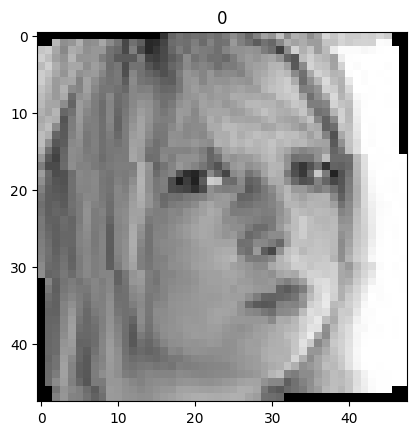

In [11]:
image , label = trainset[10]
print(image.shape)
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

providing a mapping of class names (or labels) to their corresponding indices. It is a dictionary where the keys are class names and the values are the corresponding indices used internally in the training dataset.

In [12]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Retrieving the 10,001st sample (index 10000) from the trainset, assuming it is an image-label pair. It then uses Matplotlib (plt.imshow()) to display the image after permuting the dimensions to change from the PyTorch tensor format (C, H, W) to the more conventional image format (H, W, C). Finally, the title of the plot is set to the corresponding label of the image.

Text(0.5, 1.0, '3')

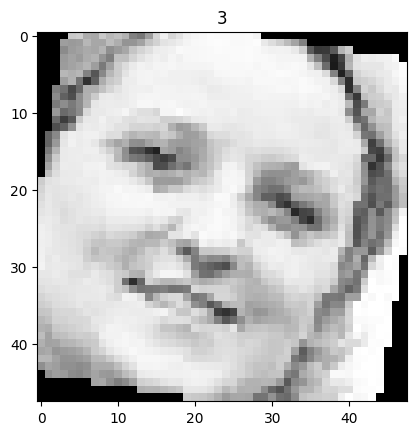

In [13]:
image , label = trainset[10000]
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

Retrieving the 2,001st sample (index 2000) from the validset, assuming it is an image-label pair. It then uses Matplotlib (plt.imshow()) to display the image after permuting the dimensions to change from the PyTorch tensor format (C, H, W) to the more conventional image format (H, W, C). Finally, the title of the plot is set to the corresponding label of the image.

Text(0.5, 1.0, '2')

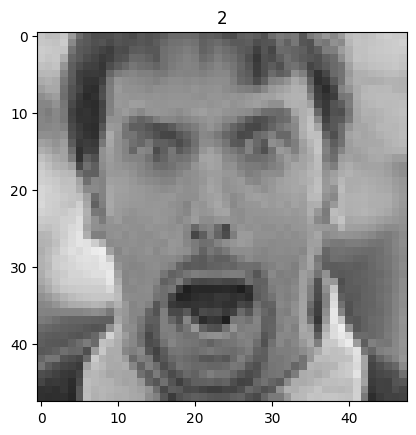

In [14]:
image , label = validset[2000]
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

providing a mapping of class names (or labels) to their corresponding indices. It is a dictionary where the keys are class names and the values are the corresponding indices used internally in the testing dataset.

In [15]:
print(validset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [16]:
from torch.utils.data import DataLoader

seting up data loaders for the training and validation sets using PyTorch's DataLoader class. 
trainloader is configured to shuffle the training data in batches of size BATCH_SIZE, while validloader loads validation data in batches of the same size without shuffling. These data loaders are useful for efficient loading of batches during model training and validation.

In [17]:
trainloader = DataLoader(trainset,batch_size=BATCH_SIZE,shuffle = True)
validloader = DataLoader(validset,batch_size=BATCH_SIZE)

In [18]:
len(validloader) #totla number of batches in validset

225

uses a trainloader to iterate through batches of images and labels. It prints the shape of one batch of images (images.shape) and one batch of labels (labels.shape). This helps in quickly checking the dimensions of the data batches during model development.

In [19]:
for images,labels in trainloader:
    break;
print(f"one images of batch shape {images.shape}")#[32 -> batch size, 3->labels , 48->height,48 -> width]
print(f"one label batch shape {labels.shape}")

one images of batch shape torch.Size([32, 3, 48, 48])
one label batch shape torch.Size([32])


In [10]:
import timm 
from torch import nn 

c:\Users\MSI\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



defining a PyTorch neural network model called ResNetModel using the ResNet34 architecture (34 Layer model: including convolutional layers, pooling layers, and fully connected layers) from the timm library. It includes an initialization method (__init__) that sets up the model with pre-trained weights and specifies 7 output classes. The forward method (forward) processes input images through the model, returning the raw logits. If labels are provided, it also calculates and returns the cross-entropy loss.

In [22]:
class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel,self).__init__()
        self.eff_net = timm.create_model('resnet34',pretrained = True,num_classes = 7)
    def forward(self,images,labels = None):
        logits = self.eff_net(images)
        if labels != None:
            loss = nn.CrossEntropyLoss()(logits,labels)
            return logits,loss
        return logits

This code snippet creates an instance of the ResNetModel class and then moves the model to the specified device (DEVICE). The model is transferred to the device to ensure that computations are performed on either the CPU or GPU, depending on the specified hardware.

In [23]:
resnet_model = ResNetModel()

resnet_model.to(DEVICE)

model.safetensors: 100%|██████████| 87.3M/87.3M [01:10<00:00, 1.25MB/s]


ResNetModel(
  (eff_net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(

In [24]:
from tqdm import tqdm


The multiclass_accuracy function calculates the accuracy of a multiclass classification model by comparing the predicted class with the highest probability to the true class labels. It returns the mean accuracy as a float tensor.

In [25]:
def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

The train_fn function is a training loop for a neural network model. It iterates over batches of training data, computes gradients, and updates the model parameters using the provided optimizer. The function tracks and displays the total loss and accuracy during training using the tqdm library. It returns the average loss and accuracy over the training set for the current epoch.

In [26]:
def train_fn(model,dataloader,optimizer,current_epo):
    model.train()
    total_loss = 0.0
    total_acc = 0.0 
    tk = tqdm(dataloader,desc = "EPOCHS" + "[TRAIN]" + str(current_epo+1) + "/"+ str(EPOCHS))
    for t,data in enumerate(tk):
        images,labels = data
        images,labels = images.to(DEVICE),labels.to(DEVICE)
        
        optimizer.zero_grad()
        logits,loss = model(images,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits,labels)
        tk.set_postfix({'loss':'%6f' %float(total_loss/(t+1)),'acc':'%6f' %float(total_acc/(t+1))})
    return total_loss/len(dataloader),total_acc/len(dataloader)

The eval_fn function evaluates a neural network model on a validation dataset. It calculates the average loss and accuracy, displaying the progress using tqdm.

In [27]:
def eval_fn(model,dataloader,current_epo):
    model.eval()
    total_loss = 0.0
    total_acc = 0.0 
    tk = tqdm(dataloader,desc = "EPOCH" + "[VALID]" + str(current_epo + 1) + "/"+ str(EPOCHS))
    for t,data in enumerate(tk):
        images,labels = data
        images,labels = images.to(DEVICE),labels.to(DEVICE)
        
        
        logits,loss = model(images,labels)
        
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits,labels)
        tk.set_postfix({'loss':'%6f' %float(total_loss/(t+1)),'acc':'%6f' %float(total_acc/(t+1))})
    return total_loss/len(dataloader),total_acc/len(dataloader)


The code initializes an Adam optimizer (resnet_optimizer) for the parameters of a ResNet model (resnet_model) with a specified learning rate (LR).

In [28]:
resnet_optimizer = torch.optim.Adam(resnet_model.parameters(), lr=LR)

This code snippet trains a ResNet model for a specified number of epochs (=20), evaluates its performance on a validation set, and saves the model's weights if the validation loss improves.

In [29]:
best_valid_losses = {'resnet': np.inf, 'inception': np.inf, 'vgg': np.inf}

for epoch in range(EPOCHS):
    resnet_train_loss, resnet_train_acc = train_fn(resnet_model, trainloader, resnet_optimizer, epoch)
     
    resnet_eval_loss, resnet_eval_acc = eval_fn(resnet_model, validloader, epoch)
    
    
    # Print progress
    print(f'Epoch [{epoch+1}/{EPOCHS}], '
          f'ResNet Train Loss: {resnet_train_loss:.4f}, Train Acc: {resnet_train_acc:.4f}, '
          f'ResNet Valid Loss: {resnet_eval_loss:.4f}, Valid Acc: {resnet_eval_acc:.4f}')
    
    # Check for improvement in validation losses for each model
    if resnet_eval_loss < best_valid_losses['resnet']:
        torch.save(resnet_model.state_dict(), 'best-resnet-weights.pt')
        print("Saved Best ResNet Valid Loss")
        best_valid_losses['resnet'] = resnet_eval_loss

EPOCH[VALID]1/20: 100%|██████████| 225/225 [00:35<00:00,  6.38it/s, loss=1.283257, acc=0.508139]


Epoch [1/20], ResNet Train Loss: 1.4817, Train Acc: 0.4224, ResNet Valid Loss: 1.2833, Valid Acc: 0.5081
Saved Best ResNet Valid Loss


EPOCH[VALID]2/20: 100%|██████████| 225/225 [00:32<00:00,  6.87it/s, loss=1.154586, acc=0.561917]


Epoch [2/20], ResNet Train Loss: 1.2280, Train Acc: 0.5342, ResNet Valid Loss: 1.1546, Valid Acc: 0.5619
Saved Best ResNet Valid Loss


EPOCH[VALID]3/20: 100%|██████████| 225/225 [00:32<00:00,  6.92it/s, loss=1.068208, acc=0.599583]


Epoch [3/20], ResNet Train Loss: 1.1410, Train Acc: 0.5668, ResNet Valid Loss: 1.0682, Valid Acc: 0.5996
Saved Best ResNet Valid Loss


EPOCH[VALID]4/20: 100%|██████████| 225/225 [00:32<00:00,  6.96it/s, loss=1.084509, acc=0.595639]


Epoch [4/20], ResNet Train Loss: 1.0888, Train Acc: 0.5870, ResNet Valid Loss: 1.0845, Valid Acc: 0.5956


EPOCH[VALID]5/20: 100%|██████████| 225/225 [00:33<00:00,  6.80it/s, loss=1.130092, acc=0.577222]


Epoch [5/20], ResNet Train Loss: 1.0449, Train Acc: 0.6079, ResNet Valid Loss: 1.1301, Valid Acc: 0.5772


EPOCH[VALID]6/20: 100%|██████████| 225/225 [00:31<00:00,  7.05it/s, loss=1.031587, acc=0.616361]


Epoch [6/20], ResNet Train Loss: 1.0130, Train Acc: 0.6196, ResNet Valid Loss: 1.0316, Valid Acc: 0.6164
Saved Best ResNet Valid Loss


EPOCH[VALID]7/20: 100%|██████████| 225/225 [00:31<00:00,  7.05it/s, loss=1.044345, acc=0.616361]


Epoch [7/20], ResNet Train Loss: 0.9740, Train Acc: 0.6351, ResNet Valid Loss: 1.0443, Valid Acc: 0.6164


EPOCH[VALID]8/20: 100%|██████████| 225/225 [00:31<00:00,  7.04it/s, loss=1.020569, acc=0.624972]


Epoch [8/20], ResNet Train Loss: 0.9434, Train Acc: 0.6461, ResNet Valid Loss: 1.0206, Valid Acc: 0.6250
Saved Best ResNet Valid Loss


EPOCH[VALID]9/20: 100%|██████████| 225/225 [00:32<00:00,  7.02it/s, loss=1.001347, acc=0.637778]


Epoch [9/20], ResNet Train Loss: 0.9080, Train Acc: 0.6616, ResNet Valid Loss: 1.0013, Valid Acc: 0.6378
Saved Best ResNet Valid Loss


EPOCH[VALID]10/20: 100%|██████████| 225/225 [00:32<00:00,  6.90it/s, loss=1.038868, acc=0.619444]


Epoch [10/20], ResNet Train Loss: 0.8755, Train Acc: 0.6760, ResNet Valid Loss: 1.0389, Valid Acc: 0.6194


EPOCH[VALID]11/20: 100%|██████████| 225/225 [00:32<00:00,  7.00it/s, loss=1.035111, acc=0.630278]


Epoch [11/20], ResNet Train Loss: 0.8489, Train Acc: 0.6835, ResNet Valid Loss: 1.0351, Valid Acc: 0.6303


EPOCH[VALID]12/20: 100%|██████████| 225/225 [00:31<00:00,  7.07it/s, loss=1.007393, acc=0.643028]


Epoch [12/20], ResNet Train Loss: 0.8129, Train Acc: 0.6962, ResNet Valid Loss: 1.0074, Valid Acc: 0.6430


EPOCH[VALID]13/20: 100%|██████████| 225/225 [00:34<00:00,  6.55it/s, loss=1.046397, acc=0.629694]


Epoch [13/20], ResNet Train Loss: 0.7811, Train Acc: 0.7085, ResNet Valid Loss: 1.0464, Valid Acc: 0.6297


EPOCH[VALID]14/20: 100%|██████████| 225/225 [00:27<00:00,  8.20it/s, loss=1.071835, acc=0.630083]


Epoch [14/20], ResNet Train Loss: 0.7490, Train Acc: 0.7210, ResNet Valid Loss: 1.0718, Valid Acc: 0.6301


EPOCH[VALID]15/20: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s, loss=1.055516, acc=0.633028]


Epoch [15/20], ResNet Train Loss: 0.7183, Train Acc: 0.7322, ResNet Valid Loss: 1.0555, Valid Acc: 0.6330


EPOCH[VALID]16/20: 100%|██████████| 225/225 [00:30<00:00,  7.39it/s, loss=1.085542, acc=0.628694]


Epoch [16/20], ResNet Train Loss: 0.6896, Train Acc: 0.7441, ResNet Valid Loss: 1.0855, Valid Acc: 0.6287


EPOCH[VALID]17/20: 100%|██████████| 225/225 [00:31<00:00,  7.21it/s, loss=1.109858, acc=0.633889]


Epoch [17/20], ResNet Train Loss: 0.6573, Train Acc: 0.7563, ResNet Valid Loss: 1.1099, Valid Acc: 0.6339


EPOCH[VALID]18/20: 100%|██████████| 225/225 [00:32<00:00,  6.82it/s, loss=1.154562, acc=0.609944]


Epoch [18/20], ResNet Train Loss: 0.6233, Train Acc: 0.7685, ResNet Valid Loss: 1.1546, Valid Acc: 0.6099


EPOCH[VALID]19/20: 100%|██████████| 225/225 [00:31<00:00,  7.10it/s, loss=1.121720, acc=0.649556]


Epoch [19/20], ResNet Train Loss: 0.5993, Train Acc: 0.7785, ResNet Valid Loss: 1.1217, Valid Acc: 0.6496


EPOCH[VALID]20/20: 100%|██████████| 225/225 [00:28<00:00,  7.82it/s, loss=1.120066, acc=0.649722]

Epoch [20/20], ResNet Train Loss: 0.5700, Train Acc: 0.7882, ResNet Valid Loss: 1.1201, Valid Acc: 0.6497


accessing the value associated with the key 'resnet' in the dictionary best_valid_losses. This value represents the best validation loss achieved during the training process for the ResNet model.

In [30]:
best_valid_losses['resnet']

1.0013466496931183

calculating the accuracy on the validation set for the ResNet model and multiplies it by 100 to convert it into a percentage. The result represents the accuracy percentage achieved by the ResNet model on the validation data.

In [31]:
resnet_eval_acc*100

tensor(64.9722)

In [32]:
!python --version
# Print PyTorch version
print("PyTorch version:", torch.__version__)

# Print timm version
print("timm version:", timm.__version__)

Python 3.8.0
PyTorch version: 2.1.2+cpu
timm version: 0.9.12
